## 目标检测
* 训练和测试数据的图片都是用把单个目标粘在背景上得来的
* 要求用卷积神经网络检测粘在背景上的目标
* 提交结果存储为xml文件，每个测试图片对应一个xml文件，存储目标方框坐标和[0, 1]之间的置信度，每张图片可以有多个置信度不同的目标框
* 提交结果的格式如example.xml所示，对应图片example.jpg
* 训练数据和测试数据分别是trianval和text

训练图片和真值方框如下所示：

In [1]:
from PIL import Image
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

In [2]:
def draw_rect(box, ax, c='r', conf=1.0):
    # 画图
    rect = patches.Rectangle(
        (box[0], box[1]), 
        box[2]-box[0], 
        box[3]-box[1], 
        linewidth=2, 
        edgecolor=c, 
        facecolor='none')
    ax.add_patch(rect)
    ax.text(x=box[0], y=box[1]-5, s='confidence=%.2f'%conf, color=c, fontsize=12)

示例结果格式如下所示：

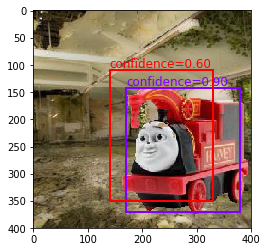

In [3]:
from matplotlib.pyplot import cm
img = Image.open('example.jpg')
img = np.array(img)
# 示例结果，两个方框，置信度分别是0.9和0.6
boxes = [[170, 142, 380, 370], [140, 110, 330, 350]]
confs = [0.9, 0.6]
fig, ax = plt.subplots(1)
ax.imshow(img)
color=iter(cm.rainbow(np.linspace(0, 1, len(boxes))))
for box, conf in zip(boxes, confs):
    c=next(color)
    draw_rect(box, ax, c, conf)
    
# 保存示例结果在example.xml里
result = ET.Element("prediction")
for box, conf in zip(boxes, confs):
    ann_bbox = ET.SubElement(result, "bndbox")
    ET.SubElement(ann_bbox, "xmin").text = str(box[0])
    ET.SubElement(ann_bbox, "ymin").text = str(box[1])
    ET.SubElement(ann_bbox, "xmax").text = str(box[2])
    ET.SubElement(ann_bbox, "ymax").text = str(box[3])
    ET.SubElement(ann_bbox, "conf").text = '%.4f'%conf
tree = ET.ElementTree(result)
tree.write('example.xml')

In [5]:
#图片保存为npy
import os
img_path = 'trainval/img/'
xml_path = 'trainval/box/'

filenames=[]
for filename in os.listdir(img_path):
    filenames.append(filename[:-4])
img_num = len(filenames)

_height=224;
_width=224;
box=[]
img_train = np.zeros((img_num, _width, _height, 3))
for i in range(img_num):
    img = Image.open(img_path + filenames[i] + '.jpg')
    img = img.resize((_width, _height))
    img_train[i] = np.array(img)
    
    xml_train = ET.parse(xml_path + filenames[i] + '.xml')
    box.append([int(xml_train.find(tag).text)-1
               for tag in ['xmin', 'ymin', 'xmax', 'ymax']])
    
np.save("x_train.npy", img_train)
np.save("y_train.npy", np.array(box))
    

OSError: cannot identify image file '/home/jill/研0考试/3-yolo/test/img/pexels-photo-106132._937.xml'

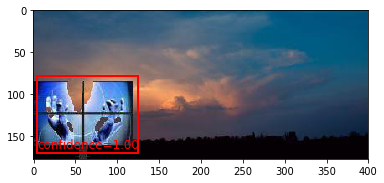

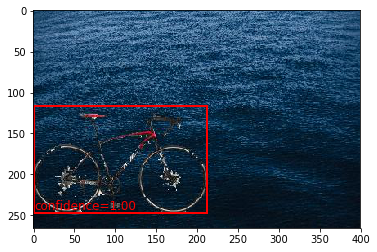

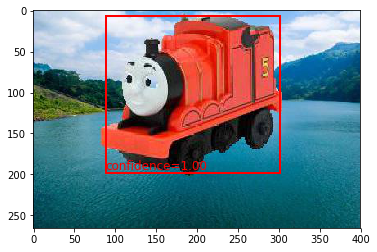

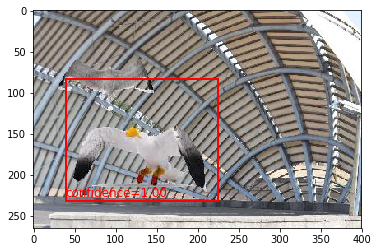

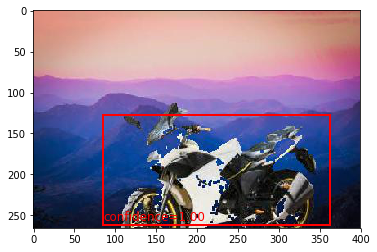

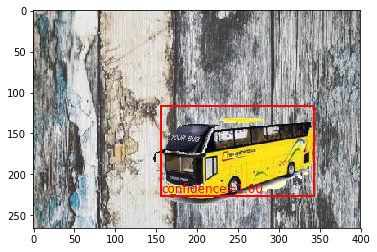

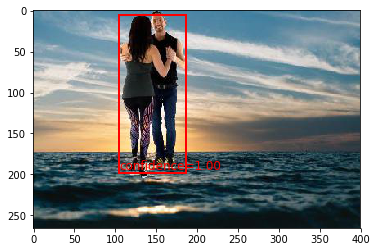

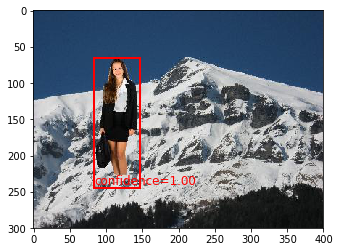

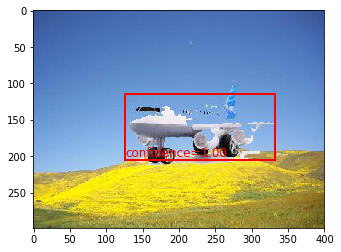

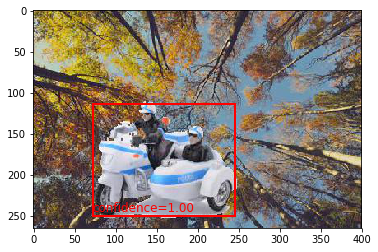

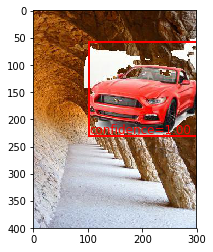

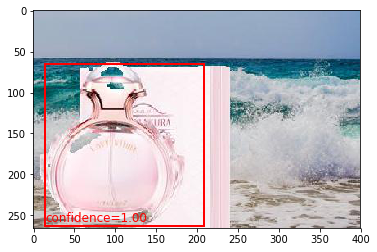

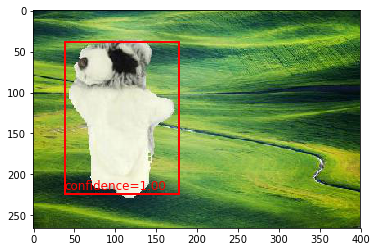

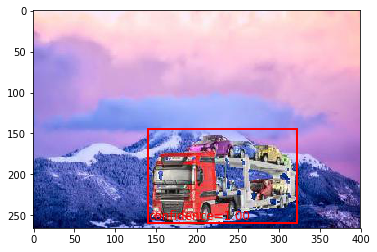

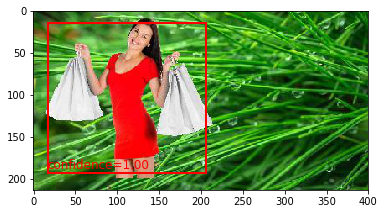

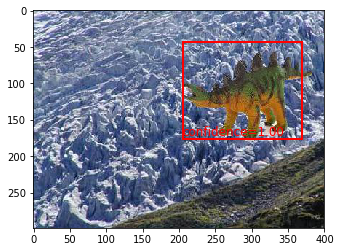

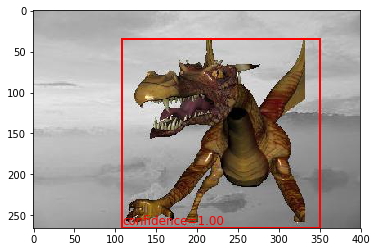

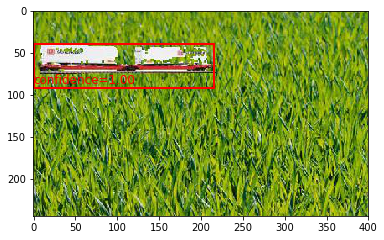

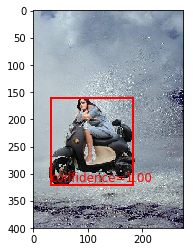

In [4]:
import os
#查看检测效果
path_img = '/home/jill/研0考试/3-yolo/test/img/'
#path_box = 'test/box/'
path_box = '/home/jill/研0考试/3-yolo/test/box/'
name_imgs = os.listdir(path_img)

for name_img in name_imgs[0:100]:
    img = Image.open(path_img + name_img)
    img = np.array(img)
    ann = ET.parse(path_box + name_img[:-4] + '.xml')
    box = [int(ann.find('bndbox').find(tag).text) for tag in ['xmin', 'ymin', 'xmax', 'ymax']]
    
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    draw_rect(box, ax)